<a href="https://colab.research.google.com/github/utkarshs75/PlayStore-Data-Analysis/blob/main/Reunion_Assignment_Task_2_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Getting both datasets and storing in variables

app = pd.read_csv('applicant.csv')
loan = pd.read_csv('loan.csv')

In [ ]:
app.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [ ]:
loan.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
data = pd.merge(app, loan)

In [ ]:
data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
data.shape

(1000, 27)

In [ ]:
data.nunique()

applicant_id                                                1000
Primary_applicant_age_in_years                                53
Gender                                                         2
Marital_status                                                 4
Number_of_dependents                                           2
Housing                                                        3
Years_at_current_residence                                     4
Employment_status                                              4
Has_been_employed_for_at_least                                 4
Has_been_employed_for_at_most                                  4
Telephone                                                      1
Foreign_worker                                                 2
Savings_account_balance                                        4
Balance_in_existing_bank_account_(lower_limit_of_bucket)       2
Balance_in_existing_bank_account_(upper_limit_of_bucket)       2
loan_application_id      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

# Data Cleaning

In [ ]:
data['Has_been_employed_for_at_least'].unique()

array(['7 years', '1 year', '4 years', nan, '0 year'], dtype=object)

In [ ]:
data['Has_been_employed_for_at_most'].unique()

array([nan, '4 years', '7 years', '0 year', '1 year'], dtype=object)

In [ ]:
def clean_emp(x):
  clean = []
  for i in x:
    if type(i) == float:
      clean.append(np.nan)
    else:
      clean.append(float(i[0]))
  return clean

data['Has_been_employed_for_at_least'] = clean_emp(list(data['Has_been_employed_for_at_least']))
data['Has_been_employed_for_at_most'] = clean_emp(list(data['Has_been_employed_for_at_most']))

In [ ]:
data['Has_been_employed_for_at_most'] = data['Has_been_employed_for_at_most'].fillna(data['Has_been_employed_for_at_most'].median())
data['Has_been_employed_for_at_least'] = data['Has_been_employed_for_at_least'].fillna(data['Has_been_employed_for_at_least'].median())

In [ ]:
data = data.drop(['Telephone'], axis = 1)
data.shape

(1000, 26)

In [ ]:
data['Savings_account_balance'] = data['Savings_account_balance'].fillna(data['Savings_account_balance'].mode()[0])
data['Savings_account_balance'].unique()

array(['Low', 'High', 'Very high', 'Medium'], dtype=object)

In [ ]:
data['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique()

array([nan, '0', '2 lac'], dtype=object)

In [ ]:
data['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()

array(['0', '2 lac', nan], dtype=object)

In [ ]:
data = data.drop(['Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)'], axis = 1)
data.shape

(1000, 24)

In [ ]:
data.Purpose.unique()

array(['electronic equipment', 'education', 'FF&E', 'new vehicle',
       'used vehicle', 'business', 'domestic appliances', 'repair costs',
       nan, 'career development'], dtype=object)

In [ ]:
data['Purpose'] = data['Purpose'].fillna(data['Purpose'].mode()[0])
data.Purpose.value_counts()

electronic equipment    292
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [ ]:
data.Property.unique()

array(['real estate', 'building society savings agreement/life insurance',
       nan, 'car or other'], dtype=object)

In [ ]:
data['Property'] = data['Property'].fillna(data['Property'].mode()[0])
data.Property.value_counts()

car or other                                         486
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [ ]:
data.Other_EMI_plans.unique()

array([nan, 'bank', 'stores'], dtype=object)

In [ ]:
data = data.drop(['Other_EMI_plans'], axis = 1)
data.shape

(1000, 23)

In [ ]:
data.Loan_history.value_counts()

existing loans paid back duly till now     530
critical/pending loans at other banks      293
delay in paying off loans in the past       88
all loans at this bank paid back duly       49
no loans taken/all loans paid back duly     40
Name: Loan_history, dtype: int64

# Data Modelling

Since wee need to decide whether the user is high risk or low risk, it is a categorical analysis with two possible outcomes. Hence, we are going to try 3 different ML models: Logistic Regression, Decision Trees, and Random Forests.

For all of them, we will need to convert all required columns into categorical data format.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   applicant_id                                 1000 non-null   int64  
 1   Primary_applicant_age_in_years               1000 non-null   int64  
 2   Gender                                       1000 non-null   object 
 3   Marital_status                               1000 non-null   object 
 4   Number_of_dependents                         1000 non-null   int64  
 5   Housing                                      1000 non-null   object 
 6   Years_at_current_residence                   1000 non-null   int64  
 7   Employment_status                            1000 non-null   object 
 8   Has_been_employed_for_at_least               1000 non-null   float64
 9   Has_been_employed_for_at_most                1000 non-null   float64
 10  F

In [ ]:
# Identifying non categorical columns and converting to categorical form

x = 0
for i in data.columns:
  print(x, len(data[i].unique()))
  x += 1

0 1000
1 53
2 2
3 4
4 2
5 3
6 4
7 4
8 4
9 4
10 2
11 4
12 1000
13 33
14 9
15 921
16 4
17 3
18 2
19 2
20 4
21 5
22 2


In [ ]:
# Rwmoving applicant_id for modelling
data = data.drop(['applicant_id', 'loan_application_id'], axis = 1)

In [ ]:
# Classifying required columns

bins = [15, 25, 35, 45, 55, 65, 75]
data['Primary_applicant_age_in_years'] = pd.cut(data['Primary_applicant_age_in_years'], bins)
data['Primary_applicant_age_in_years'] = data['Primary_applicant_age_in_years'].astype(str)
bins = [0, 1000000, 5000000, 10000000, 20000000]
data['Principal_loan_amount'] = pd.cut(data['Principal_loan_amount'], bins)
data['Principal_loan_amount'] = data['Principal_loan_amount'].astype(str)
bins = [0, 12, 24, 36, 48, 60, 72]
data['Months_loan_taken_for'] = pd.cut(data['Months_loan_taken_for'], bins)
data['Months_loan_taken_for'] = data['Months_loan_taken_for'].astype(str)

In [ ]:
# Extract all the columns which is having object format data
col_list=[]
for col in data.columns:
    if(data[col].dtype=='object'):
        col_list.append(col)
col_list

['Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Savings_account_balance',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'Property',
 'Loan_history']

In [ ]:
le = LabelEncoder()
for i in col_list:
  data[i] = le.fit_transform(data[i])
data.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,5,1,3,1,1,4,1,7.0,4.0,1,...,0,5,1,4,2,0,0,2,1,0
1,0,0,1,1,1,2,1,1.0,4.0,1,...,3,5,3,2,2,0,0,1,3,1
2,3,1,3,2,1,3,3,4.0,7.0,1,...,0,4,1,2,2,0,0,1,1,0
3,2,1,3,2,0,4,1,4.0,7.0,1,...,3,0,3,2,0,0,1,1,3,0
4,3,1,3,2,0,4,1,1.0,4.0,1,...,1,6,1,3,1,0,0,2,2,1


## Logistic Regression Model

In [ ]:
ldata = data.copy()
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   int64  
 1   Gender                                       1000 non-null   int64  
 2   Marital_status                               1000 non-null   int64  
 3   Number_of_dependents                         1000 non-null   int64  
 4   Housing                                      1000 non-null   int64  
 5   Years_at_current_residence                   1000 non-null   int64  
 6   Employment_status                            1000 non-null   int64  
 7   Has_been_employed_for_at_least               1000 non-null   float64
 8   Has_been_employed_for_at_most                1000 non-null   float64
 9   Foreign_worker                               1000 non-null   int64  
 10  S

In [ ]:
# Checking for any preexisting correlations

col_list = []
for col in ldata.columns:
  if ((ldata[col].dtypes != 'object') & (col != 'high_risk_applicant')):
    col_list.append(col)
col_list

['Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Foreign_worker',
 'Savings_account_balance',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history']

In [ ]:
x = ldata[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                                        feature        VIF
0                Primary_applicant_age_in_years   3.460959
1                                        Gender   7.552302
2                                Marital_status  13.249058
3                          Number_of_dependents  11.496608
4                                       Housing   5.496623
5                    Years_at_current_residence   8.695657
6                             Employment_status   3.192398
7                Has_been_employed_for_at_least   3.444417
8                 Has_been_employed_for_at_most   5.941748
9                                Foreign_worker  19.806134
10                      Savings_account_balance   4.685077
11                        Months_loan_taken_for   3.006426
12                                      Purpose   3.714688
13                        Principal_loan_amount   4.801763
14  EMI_rate_in_percentage_of_disposable_income   8.625034
15                                     Property   3.2889

In [ ]:
col_list.remove('Number_of_dependents')
ldata = ldata.drop('Number_of_dependents', axis = 1)
x = ldata[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                                        feature       VIF
0                Primary_applicant_age_in_years  3.430702
1                                        Gender  3.527409
2                                       Housing  5.316346
3                    Years_at_current_residence  8.290617
4                             Employment_status  3.037917
5                Has_been_employed_for_at_least  3.439428
6                 Has_been_employed_for_at_most  5.836601
7                       Savings_account_balance  4.610366
8                         Months_loan_taken_for  2.978482
9                                       Purpose  3.619204
10                        Principal_loan_amount  4.620578
11  EMI_rate_in_percentage_of_disposable_income  7.536398
12                                     Property  3.243509
13                              Has_coapplicant  1.052867
14                                Has_guarantor  1.082327
15        Number_of_existing_loans_at_this_bank  7.144551
16            

In [ ]:
# Defining dependent and independent variables and splitting for Logistic Regression

x = ldata[col_list]
y = ldata['high_risk_applicant']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [ ]:
# Fitting Logistic Regression model

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.724

In [ ]:
confusion_matrix(y_test, y_pred)

array([[165,  11],
       [ 58,  16]])

## Decision Tree Classifier

In [ ]:
cols = list(data.columns)
cols.remove('high_risk_applicant')
x = data[cols]
y = data['high_risk_applicant']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6266666666666667

In [ ]:
confusion_matrix(y_test, y_pred)

array([[152,  62],
       [ 50,  36]])

## Random Forest Classifier

In [ ]:
cols = list(data.columns)
cols.remove('high_risk_applicant')
x = data[cols]
y = data['high_risk_applicant']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7166666666666667

In [ ]:
confusion_matrix(y_test, y_pred)

array([[197,  17],
       [ 68,  18]])

## AI Model using Tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [ ]:
cols = list(data.columns)
cols.remove('high_risk_applicant')
x = data[cols]
y = data['high_risk_applicant']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape

(700, 20)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Model Building with Tensorflow
1. Model Initialization - Defining the architecture of the DL model
2. Model Compilation - Define the loss function, optimization functions
3. Model Training - # Epochs, etc.

In [ ]:
# Model Initialization

model = Sequential() # Blank Model
model.add(Input(shape = (20))) # Input Layer
model.add(Dense(units = 10, activation='relu', kernel_regularizer = l1_l2(0.001))) # Middle Layer
model.add(Dense(units = 2, activation='sigmoid')) # Output Layer

In [ ]:
# Model Compilation
model.compile(optimizer = Adam(learning_rate=0.001),
              loss="binary_crossentropy", 
              metrics="accuracy")

In [ ]:
# Model fit
history = model.fit(x=x_train,
                    y= y_train, 
                    epochs=30, 
                    batch_size = 20,
                    validation_data= (x_test,y_test))

Epoch 1/30
35/35 [==============================] - 1s 12ms/step - loss: 1.1990 - accuracy: 0.3357 - val_loss: 0.9834 - val_accuracy: 0.4067
Epoch 2/30
35/35 [==============================] - 0s 7ms/step - loss: 0.9026 - accuracy: 0.5200 - val_loss: 0.8148 - val_accuracy: 0.6600
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.7962 - accuracy: 0.6457 - val_loss: 0.7653 - val_accuracy: 0.6933
Epoch 4/30
35/35 [==============================] - 0s 5ms/step - loss: 0.7589 - accuracy: 0.6857 - val_loss: 0.7455 - val_accuracy: 0.7067
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 0.7388 - accuracy: 0.6914 - val_loss: 0.7321 - val_accuracy: 0.7067
Epoch 6/30
35/35 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.6943 - val_loss: 0.7209 - val_accuracy: 0.7067
Epoch 7/30
35/35 [==============================] - 0s 6ms/step - loss: 0.7095 - accuracy: 0.6943 - val_loss: 0.7105 - val_accuracy: 0.7100
Epoch 8/30
35/35 [=

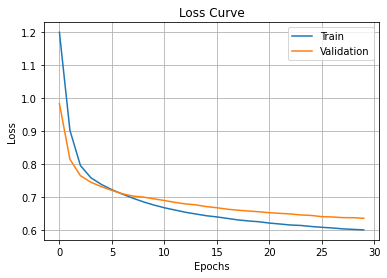

In [ ]:
# Loss curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.grid()
plt.show()

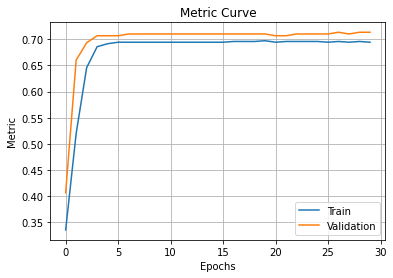

In [ ]:
# Metric curve
train_metric = history.history['accuracy']
val_metric = history.history['val_accuracy']

plt.plot(train_metric)
plt.plot(val_metric)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.title("Metric Curve")
plt.grid()
plt.show()